# Projet PANDAS - GI : Analyse de la Supply Chain

**Auteur :** [Nmar Yassir]

---

## I- Introduction et Définitions

**1. Qu’est ce que la bibliothèque PANDAS ?**
Pandas est une bibliothèque Python open-source utilisée pour l'analyse et la manipulation de données. Elle est construite au-dessus de NumPy.

**2. Utilité et champs d'application :**
*   **Utilité :** Nettoyage, exploration, transformation et visualisation des données.
*   **Champs d'application :** Finance, Marketing, Logistique (Supply Chain), Science des données.

**3. Installation :**
*   `pip install pandas`
*   Importation : `import pandas as pd`

**4. Structures de données :**
*   **Series :** Unidimensionnelle (1 colonne + index).
*   **DataFrame :** Bidimensionnelle (Tableau lignes/colonnes). C'est la structure principale.

**5. Structure des données :**
Elles doivent être tabulaires (lignes et colonnes), avec des types de données cohérents par colonne.

**6. Composition d'un DataFrame :**
Il est constitué de **Data** (valeurs), d'un **Index** (étiquettes des lignes) et de **Columns** (étiquettes des colonnes).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Pour afficher les graphiques directement
%matplotlib inline

In [2]:
# - Chargement et inspection des données

#  Chargement du fichier (Chemin basé sur ton dossier data_GI)
path = 'data_GI/supply_chain.csv'

try:
    df = pd.read_csv(path)
    print(" Fichier chargé avec succès !")
except FileNotFoundError:
    print(f" Erreur : Fichier introuvable dans {path}")

 # Résumé des données
print("\n--- Infos générales ---")
df.info()

print("\n--- Aperçu des données ---")
display(df.head())

 Fichier chargé avec succès !

--- Infos générales ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            1

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
#  Sélection et Filtrage

#  Affichage de colonnes spécifiques
print("--- Colonnes SKU et Production volumes ---")
display(df[['SKU', 'Production volumes']].head())

print("--- Colonnes Manufacturing costs et Defect rates ---")
display(df[['Manufacturing costs', 'Defect rates']].head())

#  Filtrage
# Taux de défaut > 3%
high_defect = df[df['Defect rates'] > 3]
print(f"\nProduits avec taux de défaut > 3% : {len(high_defect)}")

# Volume de production > 500
high_vol = df[df['Production volumes'] > 500]
print(f"Produits avec volume > 500 : {len(high_vol)}")

--- Colonnes SKU et Production volumes ---


,SKU,Production volumes
0,SKU0,215
1,SKU1,517
2,SKU2,971
3,SKU3,937
4,SKU4,414


--- Colonnes Manufacturing costs et Defect rates ---


,Manufacturing costs,Defect rates
0,46.279879,0.226410
1,33.616769,4.854068
2,30.688019,4.580593
3,35.624741,4.746649
4,92.065161,3.145580



Produits avec taux de défaut > 3% : 32
Produits avec volume > 500 : 57


In [4]:
# Calculs et Agrégations (Partie 1)

#  Création de colonnes calculées
# Coût total = Volume * Coût unitaire
df['Total_Manufacturing_Cost'] = df['Production volumes'] * df['Manufacturing costs']

# Unités défectueuses estimées = Volume * Taux / 100
df['Defective_Units_Est'] = (df['Production volumes'] * df['Defect rates']) / 100

print("--- Nouvelles colonnes ajoutées ---")
display(df[['SKU', 'Total_Manufacturing_Cost', 'Defective_Units_Est']].head())

--- Nouvelles colonnes ajoutées ---


,SKU,Total_Manufacturing_Cost,Defective_Units_Est
0,SKU0,9950.174037,0.486782
1,SKU1,17379.869547,25.095532
2,SKU2,29798.066789,44.477554
3,SKU3,33380.382692,44.476098
4,SKU4,38114.976488,13.022699


In [5]:
#  Calculs et Agrégations (Partie 2)

#  Agrégations
print("Taux de défaut moyen par Fournisseur ")
mean_defect = df.groupby('Supplier name')['Defect rates'].mean().sort_values(ascending=False)
display(mean_defect)

print("\n Volume total par Location ")
total_vol = df.groupby('Location')['Production volumes'].sum().sort_values(ascending=False)
display(total_vol)

Taux de défaut moyen par Fournisseur 


Supplier name
Supplier 5    2.665408
Supplier 3    2.465786
Supplier 2    2.362750
Supplier 4    2.337397
Supplier 1    1.803630
Name: Defect rates, dtype: float64


 Volume total par Location 


Location
Kolkata      15451
Mumbai       13160
Chennai      11984
Delhi         8362
Bangalore     7827
Name: Production volumes, dtype: int64

Graphique sauvegardé sous 'graphique_couts.png'


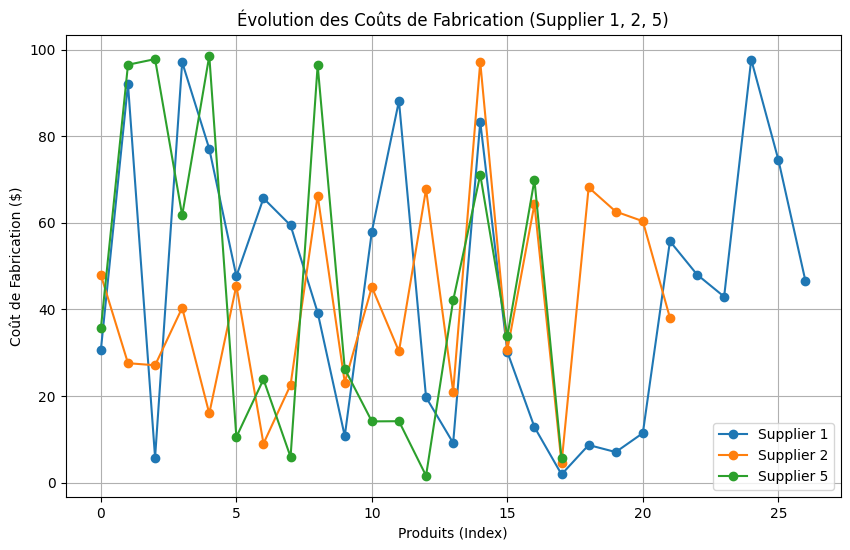

In [6]:
#  Graphique (Courbe directe)

#  Filtrer pour les fournisseurs spécifiques
suppliers_to_plot = ['Supplier 1', 'Supplier 2', 'Supplier 5']
df_graph = df[df['Supplier name'].isin(suppliers_to_plot)]

# Configuration de la figure
plt.figure(figsize=(10, 6))

#  Boucle pour tracer une courbe par fournisseur
for supplier in suppliers_to_plot:
    subset = df_graph[df_graph['Supplier name'] == supplier].reset_index()
    
    plt.plot(subset.index, subset['Manufacturing costs'], marker='o', label=supplier)

#  Esthétique
plt.title("Évolution des Coûts de Fabrication (Supplier 1, 2, 5)")
plt.xlabel("Produits (Index)")
plt.ylabel("Coût de Fabrication ($)")
plt.legend()
plt.grid(True)

#  Sauvegarde
plt.savefig('graphique_couts.png')
print("Graphique sauvegardé sous 'graphique_couts.png'")

plt.show()

## VI- Graphiques et Courbes (Théorie)

**4. Citez les types de graphes et fonctions associées :**
*   **Courbe (Line plot) :** `df.plot()` ou `plt.plot()`. Utile pour les évolutions temporelles.
*   **Histogramme (Bar plot) :** `df.plot(kind='bar')` ou `plt.bar()`. Utile pour les comparaisons.
*   **Nuage de points (Scatter plot) :** `df.plot(kind='scatter')` ou `plt.scatter()`. Utile pour les corrélations.

**5. Dessiner des courbes :**
On utilise généralement `plt.plot(x, y)` où x est l'axe horizontal et y l'axe vertical.

**6. Comment changer la couleur d’une courbe ?**
On utilise le paramètre `color` (ou `c`).
*   *Exemple :* `plt.plot(..., color='red')`

**7. Comment ajouter deux courbes sur un même graphe ?**
Il suffit d'appeler la fonction `plt.plot()` deux fois de suite dans la même cellule avant d'afficher le graphe avec `plt.show()`.

**8. Comment créer la légende et la positionner ?**
*   Il faut ajouter le paramètre `label='Nom'` dans `plt.plot()`.
*   Ensuite, on appelle `plt.legend()` pour l'afficher. On peut utiliser `loc='best'` pour la positionner automatiquement au meilleur endroit.